# Tutorial on manipulating SYN L2 AOD product from the cloud

In [11]:
import datatree
import xarray as xr
from pathlib import Path
from upath import UPath
from xarray_eop.eop import open_eop_datatree

### Get AWS credentials

In [12]:
import s3fs
import json
# Assuming credentials are in ~/.eopf/secrets.json
try:
    SECRET_PATH = Path.home() / Path(".eopf/secrets.json")
    with open(SECRET_PATH) as f:
        secrets=json.load(f)

# Or use ENV variables
except:
    import os
    secrets = {"s3input" : {
        "key": os.getenv("AWS_ACCESS_KEY_ID"),
        "secret": os.getenv("AWS_SECRET_ACCES_KEY"),
        "endpoint_url": os.getenv("AWS_ENDPOINT_URL"),
        "region_name": os.getenv("AWS_DEFAULT_REGION")
        }
    }

secrets["s3input"].pop("region_name",None)



'sbg'

### Browse S3 buckets and get SYNAOD product

In [13]:
import s3fs
SAMPLE_PATH = "s3://s3-input/Products/NewFormat/"
s3 = s3fs.S3FileSystem(
    key=secrets["s3input"]["key"],
    secret=secrets["s3input"]["secret"],
    endpoint_url=secrets["s3input"]["endpoint_url"]
)
s3_path = s3.glob(SAMPLE_PATH+"S3SYNAOD*.zip")
store=f"zip::s3://{s3_path[0]}"
store

'zip::s3://s3-input/Products/NewFormat/S3SYNAOD_20191227T124211_0060_A109_T665.zarr.zip'

### Open the whole product with datatree

In [14]:
# Custom open datatree
dt = open_eop_datatree(store,backend_kwargs={"storage_options": {"s3":secrets["s3input"]}})
# Standard open datatree
# dt = datatree.open_datatree(store,engine="zarr",chunks={},backend_kwargs={"storage_options": {"s3":secrets["s3input"]}})
dt

DataTree('None', parent=None)
├── DataTree('conditions')
│   │   Dimensions:                          (rows: 90, columns: 324)
│   │   Coordinates:
│   │       latitude                         (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       longitude                        (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │   Dimensions without coordinates: rows, columns
│   │   Data variables:
│   │       pixel_corner_latitude_corner_1   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_latitude_corner_2   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_latitude_corner_3   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_latitude_corner_4   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_longitude_corner_1  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_longitude_corner_2  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_longitude_corner_3  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       pixel_corner_longitude_corner_4  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│   │       time_reference_a                 (rows) datetime64[ns] 720B dask.array<chunksize=(90,), meta=np.ndarray>
│   └── DataTree('geometry')
│           Dimensions:                 (rows: 90, columns: 324)
│           Coordinates:
│               latitude                (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│               longitude               (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           Dimensions without coordinates: rows, columns
│           Data variables:
│               relative_azimuth_nadir  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│               satellite_zenith_nadir  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│               sun_zenith_nadir        (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
├── DataTree('measurements')
│       Dimensions:                   (rows: 90, columns: 324)
│       Coordinates:
│           latitude                  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           longitude                 (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│       Dimensions without coordinates: rows, columns
│       Data variables: (12/22)
│           aaod550                   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           ang550_865                (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           aod_1600                  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           aod_2250                  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           aod_440                   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           aod_550                   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           ...                        ...
│           surface_reflectance_1600  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           surface_reflectance_2250  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           surface_reflectance_440   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
│           surface_reflectance_550   (rows, columns) float32 117kB dask.array<chunksize

### Opening gridded measurement data

In [15]:
ds=dt.measurements
aod550 = ds.aod_550
aod550

<xarray.DataArray 'aod_550' (rows: 90, columns: 324)> Size: 117kB
dask.array<open_dataset-aod_550, shape=(90, 324), dtype=float32, chunksize=(90, 324), chunktype=numpy.ndarray>
Coordinates:
    latitude   (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
    longitude  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Aerosol optical thickness at 550 nm
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_max:      4.000999927520752
    valid_min:      0.0

Underlying data is dask.array

In [16]:
aod550.data

dask.array<open_dataset-aod_550, shape=(90, 324), dtype=float32, chunksize=(90, 324), chunktype=numpy.ndarray>

#### Simple raster plot

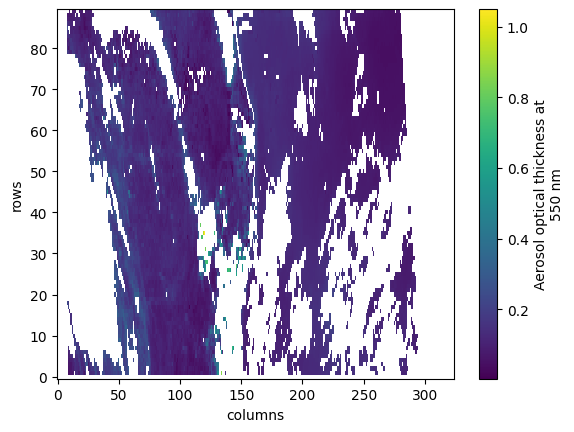

In [17]:
aod550.plot()

#### Plot using the coordinates (lon,lat)
Note that in SYN AOD product, lat/lon are undefined when the data is missing, which is not correctly handled by matplotlib pcolormesh

In [18]:
# Remove margins
aod550_dropna=aod550.dropna("columns",how="all")
aod550_dropna=aod550_dropna.dropna("rows",how="all")

# Fill remaining missing values
aod550_dropna["latitude"] = (["rows","columns"],aod550_dropna.latitude.bfill("columns").data)
aod550_dropna["longitude"] = (["rows","columns"],aod550_dropna.longitude.bfill("columns").data)

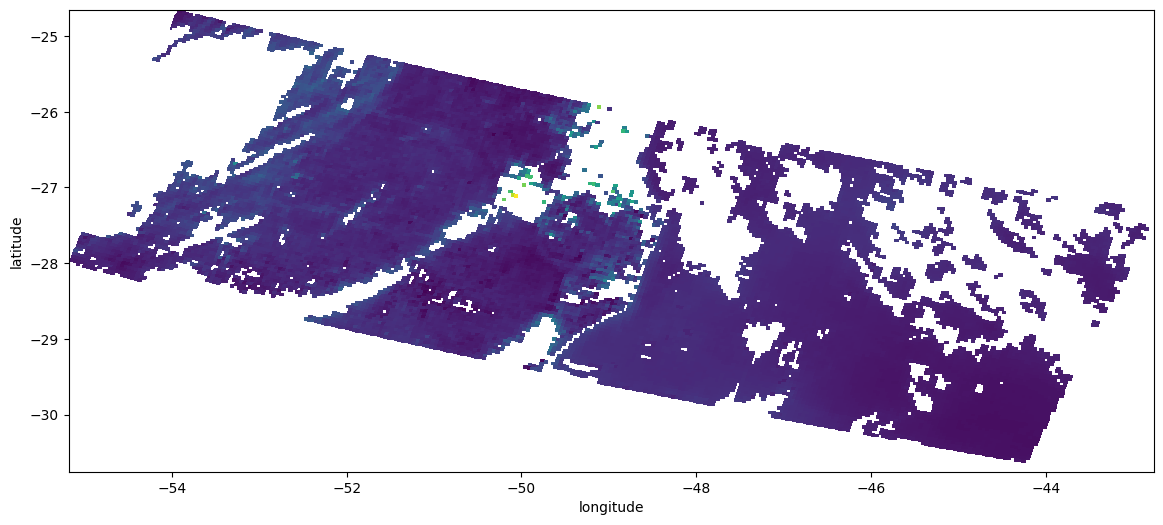

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
ax = plt.axes()
aod550_dropna.plot.pcolormesh(
    ax=ax,
    x="longitude", y="latitude", add_colorbar=False
)

#### Open uncertainties

In [20]:
ds=dt.quality
ds

DataTree('quality', parent="None")
    Dimensions:                 (rows: 90, columns: 324)
    Coordinates:
        latitude                (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        longitude               (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
    Dimensions without coordinates: rows, columns
    Data variables:
        aod_1600_uncertainty    (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_2250_uncertainty    (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_440_uncertainty     (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_550_uncertainty     (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_670_uncertainty     (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_865_uncertainty     (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        aod_quality_flags       (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        cloud_fraction_nadir    (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        cloud_fraction_oblique  (rows, columns) float32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        ol_l1b_quality_flags    (rows, columns) uint32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        sln_l1b_quality_flags   (rows, columns) uint32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>
        slo_l1b_quality_flags   (rows, columns) uint32 117kB dask.array<chunksize=(90, 324), meta=np.ndarray>